In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [2]:
def start_play(state:State):
    print("start_play node has been called")
    return {"graph_info":state['graph_info']+"I am planning to play"}

def cricket(state:State):
    print("cricket node has been called")
    return {"graph_info":state['graph_info']+" cricket"}

def football(state:State):
    print("Football node has been called")
    return {"graph_info":state['graph_info']+" FootBall"}

In [3]:
import random
from typing import Literal

def random_play(state:State) -> Literal['cricket','football']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "football"

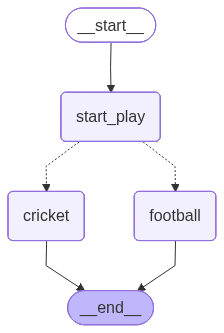

In [6]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START, END

## Build Graph
graph=StateGraph(State)

## Adding the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("football",football)

## Adding the edges
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("football",END)

## compile the graph
graph_builder=graph.compile()

## Visualize the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [18]:
graph_builder.invoke({"graph_info":"Hi my name is Anil. "})

start_play node has been called
cricket node has been called


{'graph_info': 'Hi my name is Anil. I am planning to play cricket'}